In [69]:
import pandas as pd
from pathlib import Path

from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.binarystar import BinaryStar
from posydon.binary_evol.singlestar import SingleStar
from posydon.popsyn.synthetic_population import Population
from posydon.popsyn.synthetic_population import PopulationRunner
import astropy.units as u

import os
import shutil
from posydon.config import PATH_TO_POSYDON

from POSYDONHRDiagramModule import HR_Diagram

pip install --upgrade "git+https://github.com/PiersonLip/Posydon_HR_Graphing_Script.git@main"


srun -A b1094 -p ciera-std --time=04:00:00 --mem=16G --pty /bin/bash

cd /home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis

conda activate posydon_env_v2.2

hostname

jupyter notebook --port=8383 --no-browser

In [70]:
HR_Diagram

<function POSYDONHRDiagramModule.HR_Diagram(df, df_name, history=True, init_or_final='final', path='', Star=2, variable='S1_mass', var_name='default', LogVar=False, title='default', saveLoc='', saveGraph=False, Star_Radius=True, fileName='Default', showGraph=True, palette='Default', style='default', dpi=200, ylimit=False, minR=1.5, maxR=6.5, referenceStar=False, referenceStarName='Reference Star', referenceStarRange=False, exampleLum=0, exampleTemp=0, exampleTempMin=0, exampleTempMax=0, exampleLumMin=0, exampleLumMax=0, grapher='plt')>

In [71]:
loadedpop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/InitResearch/1e+00_Zsun_population.h5')

In [72]:
cols = ['time', 'step_names', 'state', 'event', 'S1_state', 'S2_state', 'S1_mass', 'S2_mass', 'orbital_period']
finCols = [
    'orbital_period_f',
    'eccentricity_f',
    'state_f',

    'S2_state_f',
    'S2_mass_f',
    'S2_log_R_f',
    'S2_log_L_f',

    'S1_state_f',
    'S1_mass_f',
    'S1_log_R_f',
    'S1_log_L_f'

 ]

initCols = [
    'orbital_period_i',
    'eccentricity_i',
    'state_i',

    'S2_state_i',
    'S2_mass_i',
    'S2_log_R_i',

    'S1_state_i',
    'S1_mass_i',
    'S1_log_R_i'
 ]

In [73]:
XrB_Logic_Oneline = "((S2_state_f == 'BH') | (S2_state_f == 'NS')) & ((S1_state_f != 'BH') & (S1_state_f != 'NS')) | ((S1_state_f == 'BH') | (S1_state_f == 'NS')) & ((S2_state_f != 'BH') & (S2_state_f != 'NS')) & ((state_f == 'initial_RLOF') | (state_f == 'RLO2') | (state_f == 'detached')) "

XrB_Logic_History = "((S2_state == 'BH') | (S2_state == 'NS')) & ((S1_state != 'BH') & (S1_state != 'NS')) | ((S1_state == 'BH') | (S1_state == 'NS')) & ((S2_state != 'BH') & (S2_state != 'NS')) & ((state == 'initial_RLOF') | (state == 'RLO2') | (state == 'detached')) "

srun -A b1094 -p ciera-std -t 00:10:00 --mem=16G --pty /bin/bash


In [74]:
XrBsHistory = loadedpop.history.select(where=XrB_Logic_History)

In [75]:
XrBsHistory_end = XrBsHistory[XrBsHistory['event'] =='END']

In [76]:
XrBsHistory_end = XrBsHistory_end[XrBsHistory_end['state'] != 'merged']
XrBsHistory_end = XrBsHistory_end[XrBsHistory_end['state'] != 'disrupted']
# XrBsHistory_end = XrBsHistory_end[XrBsHistory_end['state'] != 'detached']


In [77]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
69,initial_RLOF,END,1.653330e+07,1.455868,0.718548,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000040,0.123550,3.605635,4.806924,4.806924,-2.788098e+49,3.355417,1.382885
118,detached,END,1.380000e+10,19180.464609,0.000998,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
150,initial_RLOF,END,1.255099e+07,29.471375,0.971184,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000051,0.217561,6.189988,8.081330,8.081330,-5.124401e+49,5.346243,2.620778
223,detached,END,1.380000e+10,4.649757,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
227,initial_RLOF,END,1.455315e+07,3.001875,0.579802,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000120,0.646848,15.492787,9.063326,9.063326,-5.880525e+49,5.944771,2.990449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,detached,END,1.380000e+10,0.563523,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99530,detached,END,1.380000e+10,21929.407898,0.000999,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99538,initial_RLOF,END,1.768064e+07,83.164970,0.970873,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000134,0.682113,14.055648,5.442792,5.442792,-3.224282e+49,3.762137,1.603143


In [78]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
69,initial_RLOF,END,1.653330e+07,1.455868,0.718548,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000040,0.123550,3.605635,4.806924,4.806924,-2.788098e+49,3.355417,1.382885
118,detached,END,1.380000e+10,19180.464609,0.000998,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
150,initial_RLOF,END,1.255099e+07,29.471375,0.971184,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000051,0.217561,6.189988,8.081330,8.081330,-5.124401e+49,5.346243,2.620778
223,detached,END,1.380000e+10,4.649757,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
227,initial_RLOF,END,1.455315e+07,3.001875,0.579802,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000120,0.646848,15.492787,9.063326,9.063326,-5.880525e+49,5.944771,2.990449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,detached,END,1.380000e+10,0.563523,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99530,detached,END,1.380000e+10,21929.407898,0.000999,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99538,initial_RLOF,END,1.768064e+07,83.164970,0.970873,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000134,0.682113,14.055648,5.442792,5.442792,-3.224282e+49,3.762137,1.603143


In [79]:
XrBs = loadedpop.oneline.select(where=XrB_Logic_Oneline)

In [80]:
XrBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
7,detached,ZAMS,0.0,2.551840,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
13,detached,ZAMS,0.0,9.444433,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
32,detached,ZAMS,0.0,421.890382,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,no_MT,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,no RLOF,NaN,0,1,1.0
40,detached,ZAMS,0.0,1.840279,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
42,detached,ZAMS,0.0,1.027062,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969,detached,ZAMS,0.0,2.023593,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
99971,detached,ZAMS,0.0,9.533302,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
99980,detached,ZAMS,0.0,1.727180,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0


In [81]:
graphing = XrBs[XrBs['state_f'] != 'merged']

In [83]:
XrBs.columns.tolist()

['state_i',
 'event_i',
 'time_i',
 'orbital_period_i',
 'eccentricity_i',
 'rl_relative_overflow_1_i',
 'rl_relative_overflow_2_i',
 'lg_mtransfer_rate_i',
 'mass_transfer_case_i',
 'step_names_i',
 'step_times_i',
 'S1_state_i',
 'S1_mass_i',
 'S1_log_R_i',
 'S1_log_L_i',
 'S1_lg_mdot_i',
 'S1_lg_system_mdot_i',
 'S1_lg_wind_mdot_i',
 'S1_he_core_mass_i',
 'S1_he_core_radius_i',
 'S1_c_core_mass_i',
 'S1_c_core_radius_i',
 'S1_o_core_mass_i',
 'S1_o_core_radius_i',
 'S1_co_core_mass_i',
 'S1_co_core_radius_i',
 'S1_center_h1_i',
 'S1_center_he4_i',
 'S1_center_c12_i',
 'S1_center_n14_i',
 'S1_center_o16_i',
 'S1_surface_h1_i',
 'S1_surface_he4_i',
 'S1_surface_c12_i',
 'S1_surface_n14_i',
 'S1_surface_o16_i',
 'S1_surf_avg_omega_i',
 'S1_surf_avg_omega_div_omega_crit_i',
 'S1_spin_i',
 'S1_conv_env_top_mass_i',
 'S1_conv_env_bot_mass_i',
 'S1_envelope_binding_energy_i',
 'S1_total_mass_h1_i',
 'S1_total_mass_he4_i',
 'S2_state_i',
 'S2_mass_i',
 'S2_log_R_i',
 'S2_log_L_i',
 'S2_lg_m

In [84]:
XrBs[initCols]

,orbital_period_i,eccentricity_i,state_i,S2_state_i,S2_mass_i,S2_log_R_i,S1_state_i,S1_mass_i,S1_log_R_i
binary_index,,,,,,,,,
7,2.551840,0.0,detached,H-rich_Core_H_burning,6.844895,0.0,H-rich_Core_H_burning,8.867681,0.0
13,9.444433,0.0,detached,H-rich_Core_H_burning,6.784954,0.0,H-rich_Core_H_burning,7.291288,0.0
32,421.890382,0.0,detached,H-rich_Core_H_burning,5.423234,0.0,H-rich_Core_H_burning,6.762176,0.0
40,1.840279,0.0,detached,H-rich_Core_H_burning,5.879136,0.0,H-rich_Core_H_burning,15.691042,0.0
42,1.027062,0.0,detached,H-rich_Core_H_burning,9.086087,0.0,H-rich_Core_H_burning,17.321011,0.0
...,...,...,...,...,...,...,...,...,...
99969,2.023593,0.0,detached,H-rich_Core_H_burning,5.123270,0.0,H-rich_Core_H_burning,18.734699,0.0
99971,9.533302,0.0,detached,H-rich_Core_H_burning,6.435650,0.0,H-rich_Core_H_burning,7.541183,0.0
99980,1.727180,0.0,detached,H-rich_Core_H_burning,4.552660,0.0,H-rich_Core_H_burning,8.471286,0.0


In [85]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
69,initial_RLOF,END,1.653330e+07,1.455868,0.718548,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000040,0.123550,3.605635,4.806924,4.806924,-2.788098e+49,3.355417,1.382885
118,detached,END,1.380000e+10,19180.464609,0.000998,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
150,initial_RLOF,END,1.255099e+07,29.471375,0.971184,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000051,0.217561,6.189988,8.081330,8.081330,-5.124401e+49,5.346243,2.620778
223,detached,END,1.380000e+10,4.649757,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
227,initial_RLOF,END,1.455315e+07,3.001875,0.579802,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000120,0.646848,15.492787,9.063326,9.063326,-5.880525e+49,5.944771,2.990449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,detached,END,1.380000e+10,0.563523,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99530,detached,END,1.380000e+10,21929.407898,0.000999,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99538,initial_RLOF,END,1.768064e+07,83.164970,0.970873,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000134,0.682113,14.055648,5.442792,5.442792,-3.224282e+49,3.762137,1.603143


In [88]:
# UCXBs['S2_log_R_f'].describe()

In [89]:
XrBsHistory_end['S2_log_R'].describe()

count    1619.000000
mean       -0.537206
std         1.526430
min        -4.745687
25%        -2.356530
50%         0.468475
75%         0.600857
max         2.306459
Name: S2_log_R, dtype: float64

In [90]:
# UCXBs[finCols]

In [91]:
# UCXBsV2[['S2_mass', 'S2_log_R', 'S1_mass', 'S1_log_R']]

In [92]:
UCXBsV2 = pd.read_csv(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/InitResearch/UCXBs.csv')

In [93]:
# HR_Diagram(UCXBsV2, df_name = 'X-ray Binaries', grapher='plt', history=True, init_or_final='final', Star_Radius=50, variable='S2_mass')

In [94]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
69,initial_RLOF,END,1.653330e+07,1.455868,0.718548,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000040,0.123550,3.605635,4.806924,4.806924,-2.788098e+49,3.355417,1.382885
118,detached,END,1.380000e+10,19180.464609,0.000998,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
150,initial_RLOF,END,1.255099e+07,29.471375,0.971184,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000051,0.217561,6.189988,8.081330,8.081330,-5.124401e+49,5.346243,2.620778
223,detached,END,1.380000e+10,4.649757,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
227,initial_RLOF,END,1.455315e+07,3.001875,0.579802,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000120,0.646848,15.492787,9.063326,9.063326,-5.880525e+49,5.944771,2.990449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,detached,END,1.380000e+10,0.563523,0.000000,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99530,detached,END,1.380000e+10,21929.407898,0.000999,-1.0,-1.0,NaN,None,step_end,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
99538,initial_RLOF,END,1.768064e+07,83.164970,0.970873,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000134,0.682113,14.055648,5.442792,5.442792,-3.224282e+49,3.762137,1.603143


In [95]:
XrBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
7,detached,ZAMS,0.0,2.551840,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
13,detached,ZAMS,0.0,9.444433,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
32,detached,ZAMS,0.0,421.890382,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,no_MT,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,no RLOF,NaN,0,1,1.0
40,detached,ZAMS,0.0,1.840279,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
42,detached,ZAMS,0.0,1.027062,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969,detached,ZAMS,0.0,2.023593,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
99971,detached,ZAMS,0.0,9.533302,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
99980,detached,ZAMS,0.0,1.727180,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0


In [96]:
XrBs['state_i'].describe()

count        14146
unique           1
top       detached
freq         14146
Name: state_i, dtype: object

In [97]:
XrBsFinal = XrBs[(XrBs['state_f'] != 'detached') & (XrBs['state_f'] != 'merged') & (XrBs['state_f'] != 'disrupted')]

In [98]:
XrBsHistory_end[['S2_mass', 'S2_log_R', 'S1_mass', 'S1_log_R']]

,S2_mass,S2_log_R,S1_mass,S1_log_R
binary_index,,,,
69,4.806924,0.419930,1.292710,-4.745687
118,1.113612,NaN,1.281444,-4.745687
150,8.081330,0.589653,1.277584,-4.745687
223,0.911586,-2.366798,1.268243,-4.745687
227,9.063326,0.622943,1.466832,-4.745687
...,...,...,...,...
99492,0.838380,-2.354679,1.272113,-4.745687
99530,1.209094,NaN,1.280879,-4.745687
99538,5.442792,0.460076,1.446966,-4.745687


In [99]:
XrBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
7,detached,ZAMS,0.0,2.551840,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
13,detached,ZAMS,0.0,9.444433,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
32,detached,ZAMS,0.0,421.890382,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,no_MT,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,no RLOF,NaN,0,1,1.0
40,detached,ZAMS,0.0,1.840279,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
42,detached,ZAMS,0.0,1.027062,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969,detached,ZAMS,0.0,2.023593,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
99971,detached,ZAMS,0.0,9.533302,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
99980,detached,ZAMS,0.0,1.727180,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0


In [100]:
UCXBsV2['S2_log_L']

0      2.430867
1      2.474237
2      1.044964
3      2.479907
4      2.792286
         ...   
409    2.408158
410    2.320688
411    2.327574
412    2.305972
413    2.386716
Name: S2_log_L, Length: 414, dtype: float64

In [101]:
XrBs[finCols].dropna()

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,


In [102]:
XrBs['state_f'].value_counts()

state_f
merged          12137
initial_RLOF     1061
detached          740
disrupted         208
Name: count, dtype: int64

In [126]:
XrBs['state_f'].value_counts()

state_f
merged          12137
initial_RLOF     1061
detached          740
disrupted         208
Name: count, dtype: int64

In [103]:
orbitalPeriodMax = 120 * u.minute
OP_Max_val = orbitalPeriodMax.to(u.day).value
UCXBs = XrBs[XrBs['orbital_period_f'] < OP_Max_val]

In [123]:
UCXBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
1039,detached,ZAMS,0.0,25.761467,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
1324,detached,ZAMS,0.0,468.301400,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
1496,detached,ZAMS,0.0,330.513135,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
2987,detached,ZAMS,0.0,18.145929,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
3427,detached,ZAMS,0.0,14.083524,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95142,detached,ZAMS,0.0,27.288075,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
95297,detached,ZAMS,0.0,11.280857,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
95372,detached,ZAMS,0.0,23.976463,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0


In [104]:
UCXBs['state_f'].value_counts()

state_f
initial_RLOF    73
Name: count, dtype: int64

In [105]:
UCXBs[UCXBs['S1_state_f'] == 'BH'][finCols]


,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,
3427,0.051140,0.0,initial_RLOF,stripped_He_non_burning,2.504567,-0.444663,NaN,BH,2.687964,-4.942702,NaN
83713,0.057009,0.0,initial_RLOF,stripped_He_non_burning,2.583030,-0.448545,NaN,BH,2.673516,-4.945042,NaN


<Axes: >

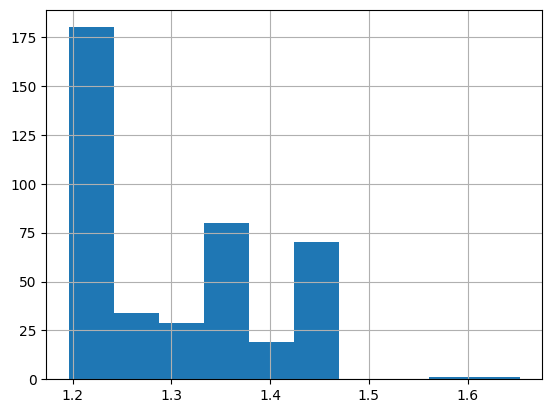

In [106]:
UCXBsV2['S1_mass'].hist()

In [107]:
UCXBs['state_f'].value_counts()

state_f
initial_RLOF    73
Name: count, dtype: int64

In [108]:
UCXBs[initCols].describe()

,orbital_period_i,eccentricity_i,S2_mass_i,S2_log_R_i,S1_mass_i,S1_log_R_i
count,73.000000,73.0,73.000000,73.0,73.000000,73.0
mean,56.868423,0.0,6.614727,0.0,8.731964,0.0
std,74.200678,0.0,1.136029,0.0,2.342471,0.0
min,10.757749,0.0,4.980114,0.0,7.308563,0.0
25%,19.655951,0.0,5.912915,0.0,7.806480,0.0
50%,27.288075,0.0,6.267708,0.0,7.891966,0.0
75%,55.035621,0.0,7.099656,0.0,7.986023,0.0
max,468.301400,0.0,9.819122,0.0,19.006652,0.0


In [109]:
XrBsFinal

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
69,detached,ZAMS,0.0,1736.648465,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable RLOF during postMS,NaN,NaN,NaN,0,1,1.0
150,detached,ZAMS,0.0,2783.924950,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable RLOF during postMS,NaN,NaN,NaN,0,1,1.0
227,detached,ZAMS,0.0,5.966397,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
481,detached,ZAMS,0.0,9.483866,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,1,1.0
531,detached,ZAMS,0.0,6.856116,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99164,detached,ZAMS,0.0,1320.096751,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable RLOF during postMS,NaN,NaN,NaN,0,1,1.0
99201,detached,ZAMS,0.0,1950.251568,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable RLOF during postMS,NaN,NaN,NaN,0,1,1.0
99432,detached,ZAMS,0.0,18.559318,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0


In [110]:
UCXBs[finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,
1039,0.040663,0.0,initial_RLOF,stripped_He_non_burning,0.956459,-0.736708,NaN,NS,1.277638,-4.745687,NaN
1324,0.040233,0.0,initial_RLOF,stripped_He_non_burning,1.079155,-0.704954,NaN,NS,1.286528,-4.745687,NaN
1496,0.038571,0.0,initial_RLOF,stripped_He_non_burning,1.547980,-0.619642,NaN,NS,1.267601,-4.745687,NaN
2987,0.032256,0.0,initial_RLOF,stripped_He_non_burning,1.201253,-0.674532,NaN,NS,1.266089,-4.745687,NaN
3427,0.051140,0.0,initial_RLOF,stripped_He_non_burning,2.504567,-0.444663,NaN,BH,2.687964,-4.942702,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95142,0.038529,0.0,initial_RLOF,stripped_He_non_burning,1.519838,-0.623381,NaN,NS,1.287843,-4.745687,NaN
95297,0.036670,0.0,initial_RLOF,stripped_He_non_burning,0.978113,-0.728608,NaN,NS,1.256702,-4.745687,NaN
95372,0.038975,0.0,initial_RLOF,stripped_He_non_burning,1.478414,-0.631347,NaN,NS,1.267262,-4.745687,NaN


In [111]:
historyFinCols = ['S2_mass', 'S2_log_R', 'S1_mass', 'S1_log_R']

In [112]:
UCXBsV2[historyFinCols]

,S2_mass,S2_log_R,S1_mass,S1_log_R
0,1.002631,-0.671734,1.196033,-4.745687
1,0.995752,-0.645695,1.196033,-4.745687
2,0.588549,-1.734909,1.447240,-4.745687
3,0.994781,-0.642391,1.196033,-4.745687
4,0.629272,-0.765929,1.426753,-4.745687
...,...,...,...,...
409,1.005995,-0.685923,1.196033,-4.745687
410,0.798373,-0.706517,1.365607,-4.745687
411,0.821736,-0.678814,1.350696,-4.745687
412,0.801076,-0.689222,1.364058,-4.745687


In [113]:
HR_Diagram(UCXBsV2, df_name = 'X-ray Binaries', grapher='bokeh', Star_Radius=3, variable='eccentricity')

Loading BokehJS ...

/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:387: RuntimeWarning: divide by zero encountered in log10
/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:388: RuntimeWarning: divide by zero encountered in log10


In [114]:
UCXBs[finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,
1039,0.040663,0.0,initial_RLOF,stripped_He_non_burning,0.956459,-0.736708,NaN,NS,1.277638,-4.745687,NaN
1324,0.040233,0.0,initial_RLOF,stripped_He_non_burning,1.079155,-0.704954,NaN,NS,1.286528,-4.745687,NaN
1496,0.038571,0.0,initial_RLOF,stripped_He_non_burning,1.547980,-0.619642,NaN,NS,1.267601,-4.745687,NaN
2987,0.032256,0.0,initial_RLOF,stripped_He_non_burning,1.201253,-0.674532,NaN,NS,1.266089,-4.745687,NaN
3427,0.051140,0.0,initial_RLOF,stripped_He_non_burning,2.504567,-0.444663,NaN,BH,2.687964,-4.942702,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95142,0.038529,0.0,initial_RLOF,stripped_He_non_burning,1.519838,-0.623381,NaN,NS,1.287843,-4.745687,NaN
95297,0.036670,0.0,initial_RLOF,stripped_He_non_burning,0.978113,-0.728608,NaN,NS,1.256702,-4.745687,NaN
95372,0.038975,0.0,initial_RLOF,stripped_He_non_burning,1.478414,-0.631347,NaN,NS,1.267262,-4.745687,NaN


In [115]:
UCXBsV2[historyFinCols].describe()

,S2_mass,S2_log_R,S1_mass,S1_log_R
count,414.000000,414.000000,414.000000,414.000000
mean,0.854189,-0.838528,1.295899,-4.745687
std,0.155229,0.421058,0.098702,0.000000
min,0.516925,-2.295000,1.196033,-4.745687
25%,0.795866,-0.732627,1.196033,-4.745687
50%,0.894513,-0.676084,1.275613,-4.745687
75%,0.996863,-0.652199,1.366403,-4.745687
max,1.006803,-0.633801,1.652616,-4.745687


In [116]:
UCXBs['state_f'].value_counts()

state_f
initial_RLOF    73
Name: count, dtype: int64

In [117]:
XrBsFinal[finCols].describe()

,orbital_period_f,eccentricity_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_mass_f,S1_log_R_f,S1_log_L_f
count,1061.000000,1061.000000,1061.000000,1061.000000,988.000000,1061.000000,1061.000000,0.0
mean,47.677290,0.750196,7.008787,0.514626,3.432617,1.559846,-4.755467,NaN
std,689.464437,0.261494,2.365430,0.364626,0.462667,0.410991,0.042635,NaN
min,0.031889,0.000000,0.503199,-0.765865,1.404870,1.252781,-4.971900,NaN
25%,1.497010,0.669955,5.538865,0.473983,3.098930,1.277584,-4.745687,NaN
50%,3.075750,0.838449,7.086177,0.556475,3.440904,1.319884,-4.745687,NaN
75%,7.770192,0.927277,8.793711,0.652418,3.800421,1.728928,-4.745687,NaN
max,21631.298172,0.999605,12.516516,2.306459,4.681561,3.091510,-4.745687,NaN


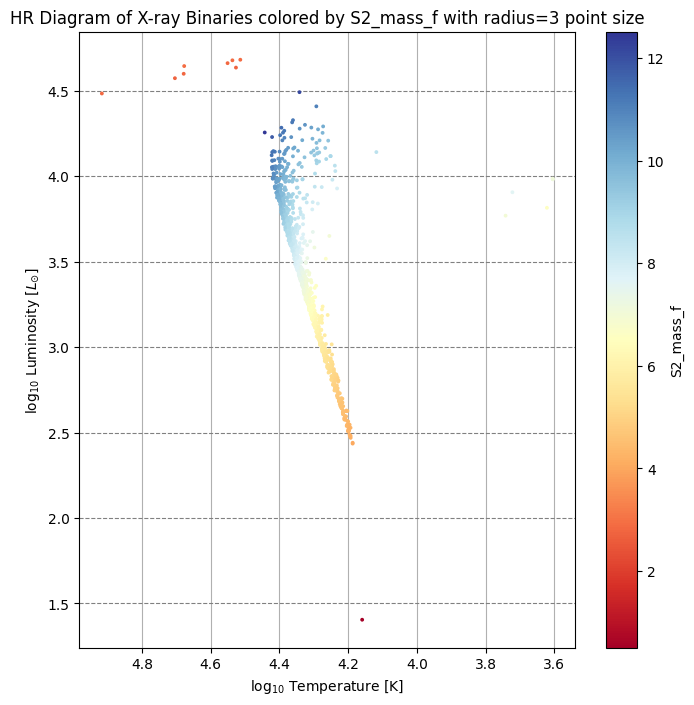

In [118]:
HR_Diagram(XrBsFinal, df_name = 'X-ray Binaries', grapher='plt', history=False, init_or_final='final', Star_Radius=3, variable='S2_mass_f')

In [119]:
HR_Diagram(
    UCXBs,
    df_name='X-ray Binaries',
    grapher='bokeh',
    history=False,
    init_or_final='final',
    Star_Radius=3,
    variable='S2_mass_f',
)


Loading BokehJS ...

/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:387: RuntimeWarning: divide by zero encountered in log10
/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:388: RuntimeWarning: divide by zero encountered in log10


In [120]:
UCXBs['S2_state_f'].value_counts()

S2_state_f
stripped_He_non_burning    73
Name: count, dtype: int64

In [121]:
UCXBsV2['S2_state'].value_counts()

S2_state
stripped_He_Core_He_burning        313
stripped_He_Central_He_depleted     84
WD                                  17
Name: count, dtype: int64

In [122]:
HR_Diagram(UCXBsV2, df_name = 'X-ray Binaries', grapher='bokeh', Star_Radius=3)

Loading BokehJS ...

/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:387: RuntimeWarning: divide by zero encountered in log10
/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:388: RuntimeWarning: divide by zero encountered in log10


posydon-popsyn setup ucxb_grid_params_v_2.ini --job_array=50 --walltime=24:00:00 --partition=ciera-std --account=b1094 --email=piersonlipschultz@gmail.com --mem_per_cpu=12G


bash slurm_submit.sh